In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Paths Setup: It defines main_path as the root directory for the data and partial_epoch_path as a subdirectory.
main_path = '/ibmm_data/TemBERTure/model/'
partial_epoch_path ='/BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/'
full_cls_epoch_path = '/BERTSequential/2_LAYERS_HEAD/FULL_CLS_TRAINING/'
random_individual_path = '/BERT_regr/2_LAYER_HEAD/'

# Categories: Lists of category names (categories) and composed paths (categories_path) are set.
## *** KEEP THE SAME ORDER BETWEEN categories AND categories_path TO MAKE THE PATH READER WORKING LATER ***
categories = ['0_25', '0_50', '0_75', '1/1E-3','FULL_CLS','RANDOM']
# composed path for each category
categories_path=[f'{partial_epoch_path}0_25',f'{partial_epoch_path}0_50',f'{partial_epoch_path}0_75',f'{partial_epoch_path}1/1E-3',f'{full_cls_epoch_path}',f'{random_individual_path}']


# Correlation plots : within replicas

This script dynamically loads data for each category and plots the predictions of the models using different color palette assigned to each category.

    1. Setting a variable test_data as 'test' or 'val' based on which data is intended for regression validation.
    2. Defining a list of colors for plotting.
    3. Creating a plot figure.
    4. Looping through categories and collecting data from specified file paths.
    5. Concatenating and organizing the collected data.
    6. Plotting a scatterplot using Seaborn, showcasing predictions versus real values from the collected data.

/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_25/3_REPLICAS/*replica1/output/checkpoint*_best_model/TEST/test_on_regression_test_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_25/3_REPLICAS/*replica2/output/checkpoint*_best_model/TEST/test_on_regression_test_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_25/3_REPLICAS/*replica3/output/checkpoint*_best_model/TEST/test_on_regression_test_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_50/3_REPLICAS/*replica1/output/checkpoint*_best_model/TEST/test_on_regression_test_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_50/3_REPLICAS/*replica2/output/checkpoint*_best_model/TEST/test_on_regression_test_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequent

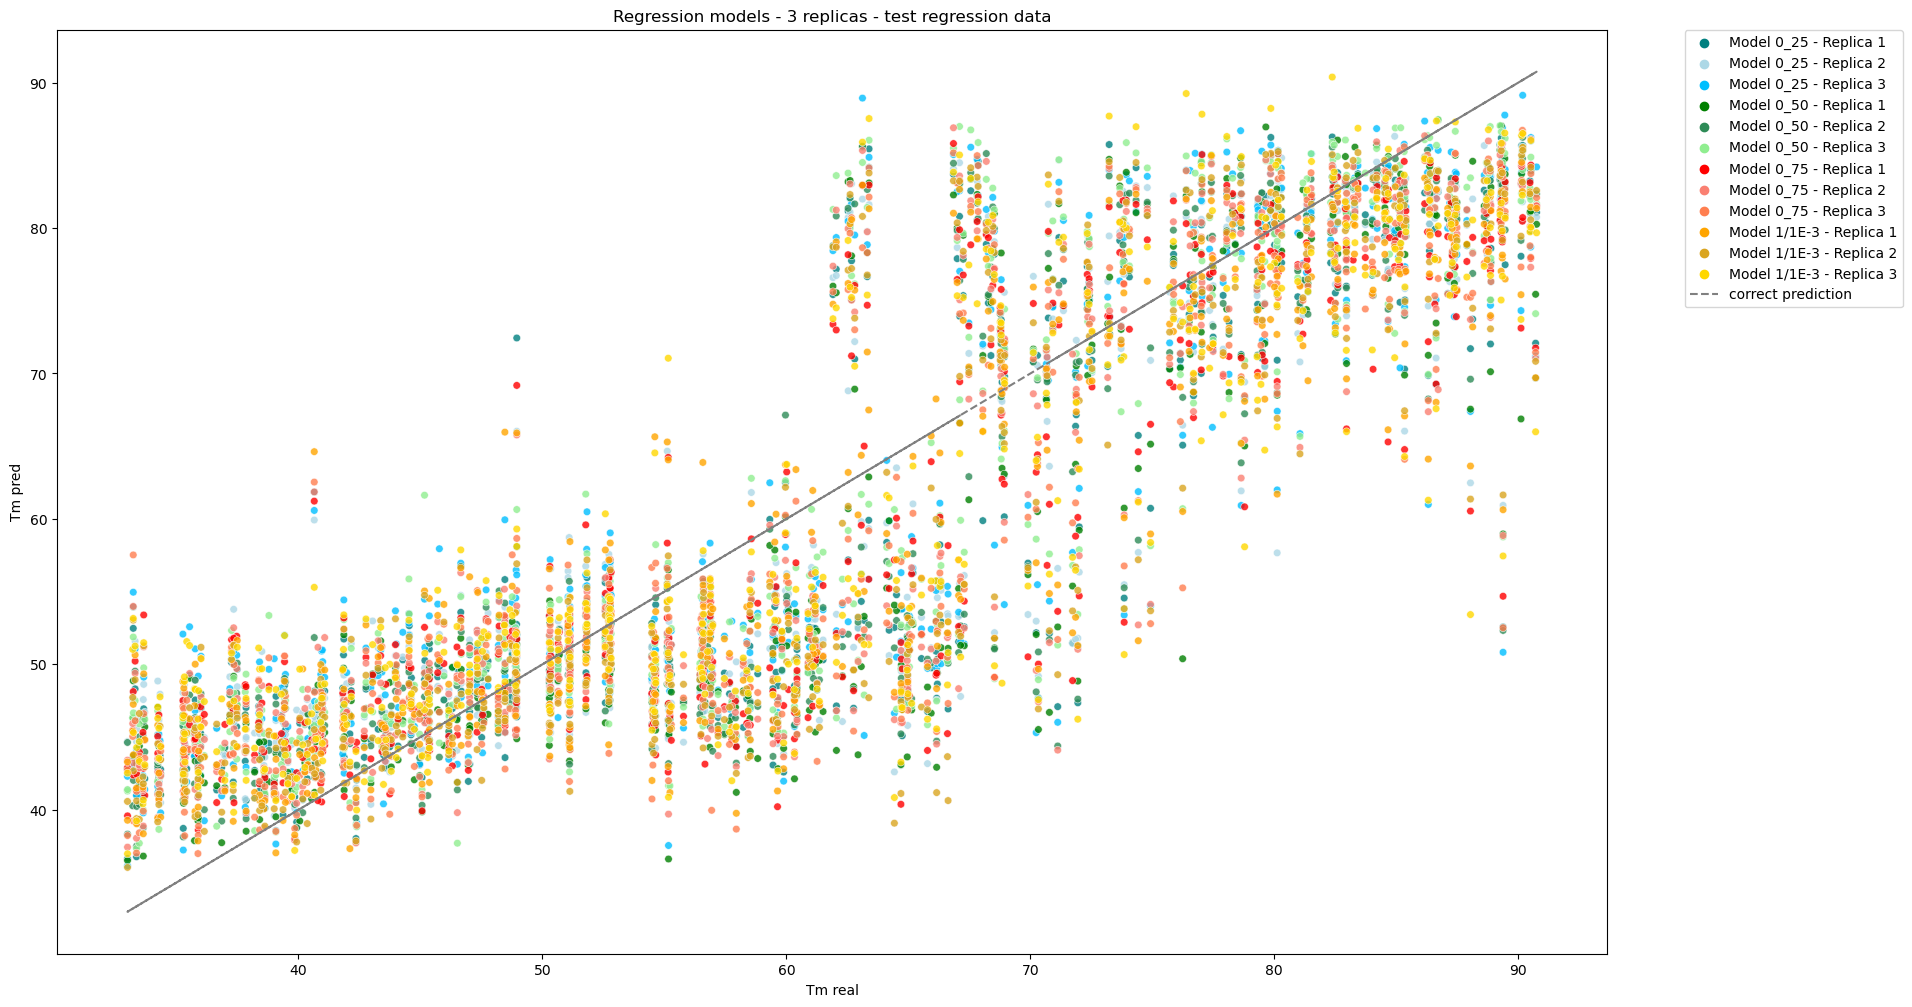

In [19]:
#### TEST REGRESSION DATA

# Set the type of data for regression testing: 'test' or 'val'
test_data = 'test'  # switch to 'val' if checking regression_val data

# Define a list of colors for plotting
colors = ['teal', 'lightblue', 'deepskyblue', 'green', 'seagreen', 'lightgreen', 'red', 'salmon', 'coral', 'orange', 'goldenrod', 'gold']

# Create a figure for the plot
plt.figure(figsize=(20, 12))

# Initialize an empty list to collect data from all categories
all_data = []

# Loop through categories and collect data from specified file paths
c = 0
for category in categories:
    data_category = []
    for i in range(1, 4):
        # Create a path pattern to search for specific files
        path_pattern = f"{main_path}{categories_path[c]}/3_REPLICAS/*replica{i}/output/checkpoint*_best_model/TEST/test_on_regression_{test_data}_data/test/test_out.txt"
        print(path_pattern)  # Output the path pattern for visibility
        files = glob.glob(path_pattern)  # Find files matching the pattern
        # Read and concatenate data from found files
        category_data = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
        category_data['Category'] = f'Model {category} - Replica {i}'
        data_category.append(category_data)
        
    c += 1
    # Concatenate data for each category and replica
    category_concat = pd.concat(data_category, ignore_index=True)
    all_data.append(category_concat)

# Combine all collected data and plot as a single scatter plot
all_data = pd.concat(all_data, ignore_index=True)

# Create a scatterplot using Seaborn with various settings
sns.scatterplot(data=all_data, x='tm', y='prediction', hue='Category', palette=colors, s=30, alpha=0.8)
plt.plot(all_data['tm'], all_data['tm'], color='gray', linestyle='--', label='correct prediction')

# Set labels and title for the plot
plt.xlabel('Tm real')
plt.ylabel('Tm pred')
plt.title(f'Regression models - 3 replicas - {test_data} regression data')

# Display legend and show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()


/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_25/3_REPLICAS/*replica1/output/checkpoint*_best_model/TEST/test_on_regression_val_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_25/3_REPLICAS/*replica2/output/checkpoint*_best_model/TEST/test_on_regression_val_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_25/3_REPLICAS/*replica3/output/checkpoint*_best_model/TEST/test_on_regression_val_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_50/3_REPLICAS/*replica1/output/checkpoint*_best_model/TEST/test_on_regression_val_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2_LAYERS_HEAD/PARTIAL_EPOCH_CLS_WEIGHTS/0_50/3_REPLICAS/*replica2/output/checkpoint*_best_model/TEST/test_on_regression_val_data/test/test_out.txt
/ibmm_data/TemBERTure/model//BERTSequential/2

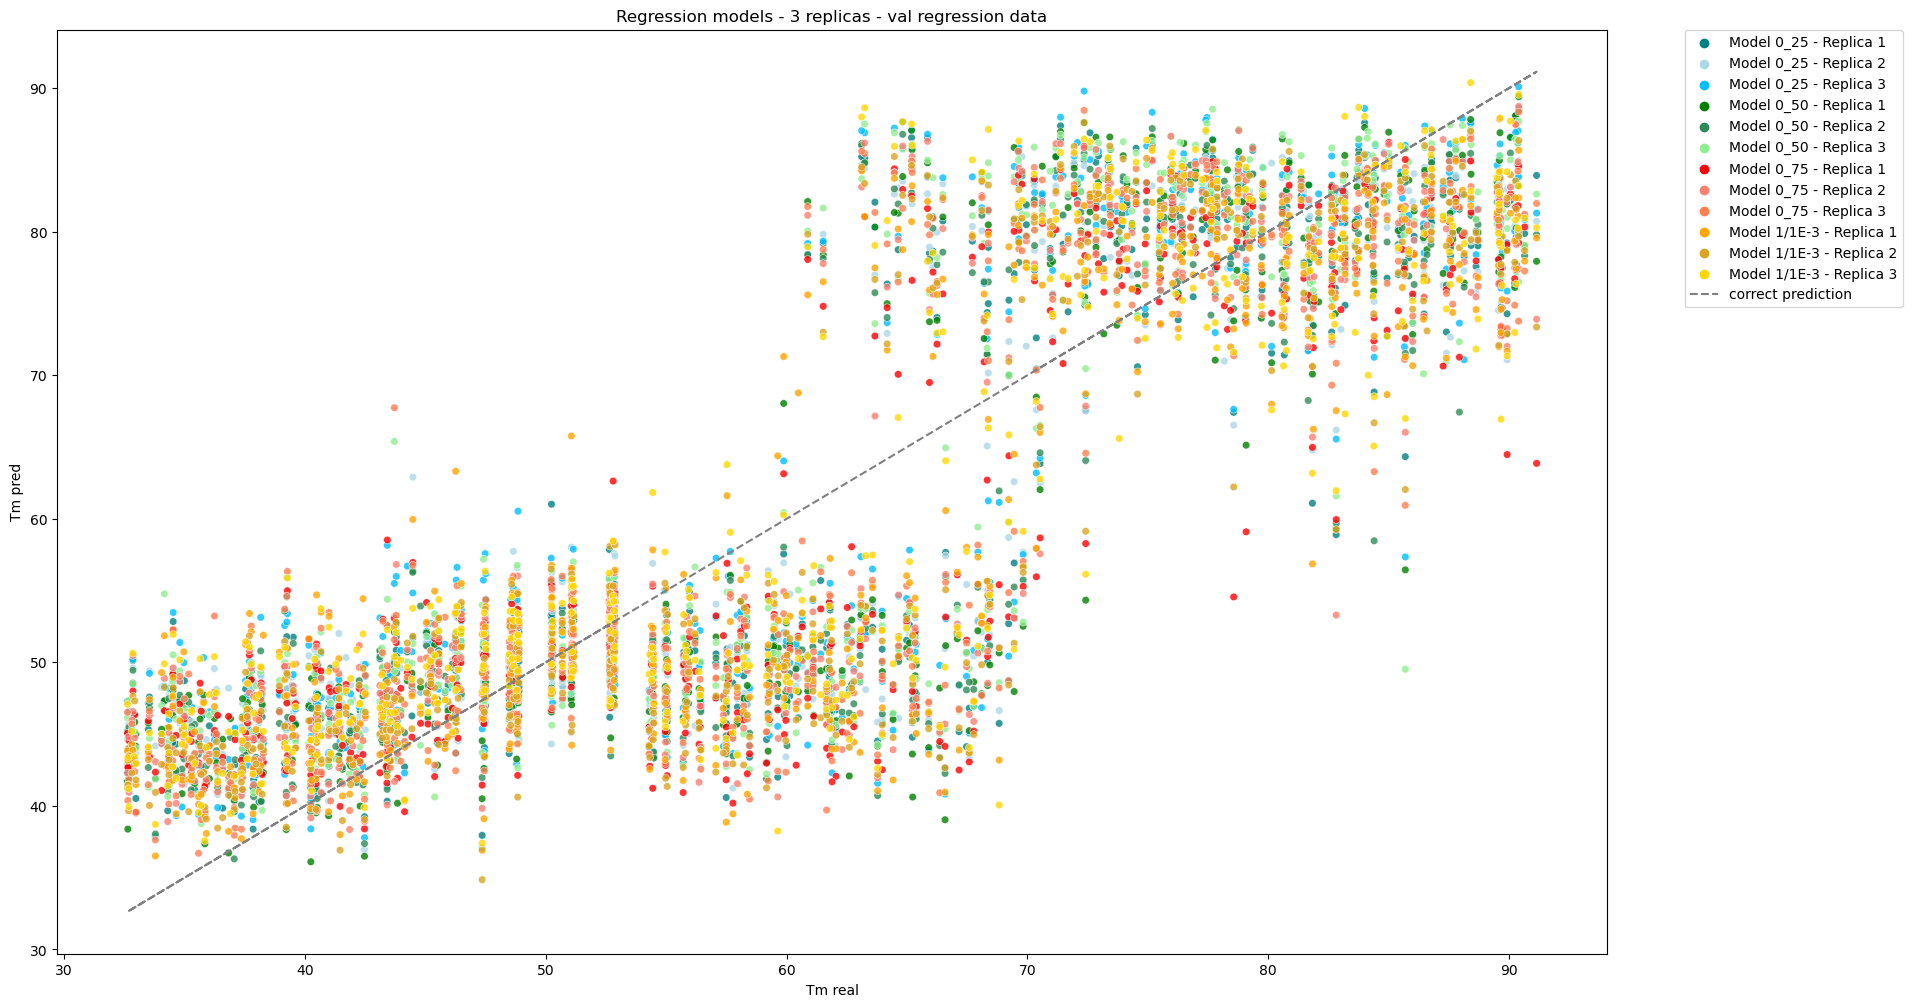

In [18]:
#### VALIDATION REGRESSION DATA

# Set the type of data for regression testing: 'test' or 'val'
test_data = 'val'  # switch to 'val' if checking regression_val data

# Define a list of colors for plotting
colors = ['teal', 'lightblue', 'deepskyblue', 'green', 'seagreen', 'lightgreen', 'red', 'salmon', 'coral', 'orange', 'goldenrod', 'gold']

# Create a figure for the plot
plt.figure(figsize=(20, 12))

# Initialize an empty list to collect data from all categories
all_data = []

# Loop through categories and collect data from specified file paths
c = 0
for category in categories:
    data_category = []
    for i in range(1, 4):
        # Create a path pattern to search for specific files
        path_pattern = f"{main_path}{categories_path[c]}/3_REPLICAS/*replica{i}/output/checkpoint*_best_model/TEST/test_on_regression_{test_data}_data/test/test_out.txt"
        print(path_pattern)  # Output the path pattern for visibility
        files = glob.glob(path_pattern)  # Find files matching the pattern
        # Read and concatenate data from found files
        category_data = pd.concat([pd.read_csv(file) for file in files], ignore_index=True)
        category_data['Category'] = f'Model {category} - Replica {i}'
        data_category.append(category_data)
        
    c += 1
    # Concatenate data for each category and replica
    category_concat = pd.concat(data_category, ignore_index=True)
    all_data.append(category_concat)

# Combine all collected data and plot as a single scatter plot
all_data = pd.concat(all_data, ignore_index=True)

# Create a scatterplot using Seaborn with various settings
sns.scatterplot(data=all_data, x='tm', y='prediction', hue='Category', palette=colors, s=30, alpha=0.8)
plt.plot(all_data['tm'], all_data['tm'], color='gray', linestyle='--', label='correct prediction')

# Set labels and title for the plot
plt.xlabel('Tm real')
plt.ylabel('Tm pred')
plt.title(f'Regression models - 3 replicas - {test_data} regression data')

# Display legend and show the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()
